<h1 style=font-size:30px><b>Importing Libraries</h1>

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<br><h1 style=font-size:30px><b>Data Preparation</h1>

<h2 style=font-size:20px><b><u>Reading the Data</u></h2>


In [113]:
df = pd.read_excel("data/SeoulBikeData.xlsx")
df

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,2017-12-01,0,-5.2,37.0,2.2,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,2017-12-01,1,-5.5,NaN,0.8,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2017-12-01,2,-6.0,39.0,NaN,"2,000",-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,2017-12-01,3,-6.2,40.0,0.9,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,2017-12-01,4,-6.0,36.0,2.3,"2,000",-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34.0,2.6,"1,894",-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,2018-11-30,20,3.4,37.0,2.3,"2,000",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,2018-11-30,21,2.6,39.0,0.3,"1,968",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,2018-11-30,22,NaN,41.0,1.0,"1,859",-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


The fields/variables along with their data types are as follows:
<br>

| Column / Field / Variable |    Data type    |
|:-------------------------:|:---------------:|
|           Date            |    Datetime     | 
|           Hour            |     Integer     | 
|      Temperature(∞C)      |      Float      |
|        Humidity(%)        |      Float      |
|     Wind speed (m/s)      |      Float      |
|     Visibility (10m)      | Object (String) |
| Dew point temperature(∞C) |      Float      |
|  Solar Radiation (MJ/m2)  |      Float      |
|       Rainfall(mm)        |      Float      |
|       Snowfall (cm)       |      Float      |
|          Seasons          | Object (String) |
|          Holiday          | Object (String) |
|      Functioning Day      | Object (String) |
|      Rented Bike Count      |     Integer     |
<br>


In [114]:
#Validating the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8322 non-null   float64       
 3   Humidity(%)                8322 non-null   float64       
 4   Wind speed (m/s)           8322 non-null   float64       
 5   Visibility (10m)           8760 non-null   object        
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [115]:
df.describe()

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760,8760.000000,8322.000000,8322.000000,8322.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,11.500000,12.902547,58.528238,1.729801,4.073813,0.569111,0.148687,0.075068,704.602055
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,5.750000,3.500000,42.250000,0.900000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,2018-06-01 00:00:00,11.500000,13.800000,57.000000,1.500000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,2018-08-31 00:00:00,17.250000,22.500000,74.000000,2.300000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,2018-11-30 00:00:00,23.000000,39.400000,700.000000,7.400000,27.200000,3.520000,35.000000,8.800000,3556.000000
std,NaN,6.922582,11.958612,23.212680,1.038008,13.060369,0.868746,1.128193,0.436746,644.997468


In [116]:
MissingValues= df.isnull().sum()
MissingValues

Date                           0
Hour                           0
Temperature(∞C)              438
Humidity(%)                  438
Wind speed (m/s)             438
Visibility (10m)               0
Dew point temperature(∞C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
Rented Bike Count              0
dtype: int64

<br><h1 style=font-size:30px><b>Data Cleaning & Preparation</h1>

<h2 style=font-size:20px><b><u>Data Imputation</u></h2>

In [117]:
null_rows = df[df.isna().any(axis=1)]
null_rows

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
1,2017-12-01,1,-5.5,NaN,0.8,"2,000",-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,204
2,2017-12-01,2,-6.0,39.0,NaN,"2,000",-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,173
14,2017-12-01,14,NaN,26.0,2.0,"2,000",-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,447
17,2017-12-01,17,NaN,58.0,1.6,"2,000",-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,555
19,2017-12-01,19,0.0,NaN,1.7,"2,000",-3.5,0.00,0.0,0.0,Winter,No Holiday,Yes,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,2018-11-29,14,6.0,NaN,0.6,"1,452",-11.6,0.34,0.0,0.0,Autumn,No Holiday,Yes,668
8738,2018-11-30,2,0.6,66.0,NaN,"1,368",-5.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,300
8745,2018-11-30,9,-0.4,NaN,0.6,"1,270",-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes,809
8753,2018-11-30,17,NaN,29.0,2.1,"1,877",-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,1047


In [118]:
null_columns = df.columns[df.isna().any()]
for c in null_columns:
    if df[c].dtype != 'object':
        value = df[c].mean()
    else:
        value = df[c].mode()[0]
        
    df[c] = df[c].fillna(value)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   float64       
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   object        
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

<h2 style=font-size:20px><b><u>Data Wrangling</u></h2>

In [120]:
df["Visibility (10m)"]=df["Visibility (10m)"].apply(lambda x: int(x.replace(",","")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   float64       
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [121]:
df.insert(1, "Month", df["Date"].dt.month)
df.insert(2, "Day", df["Date"].dt.day_name())
df.drop(columns=["Date"], inplace=True)

In [122]:
df

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,12,Friday,0,-5.200000,37.000000,2.200000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,12,Friday,1,-5.500000,58.528238,0.800000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.000000,39.000000,1.729801,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,12,Friday,3,-6.200000,40.000000,0.900000,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,12,Friday,4,-6.000000,36.000000,2.300000,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,Friday,19,4.200000,34.000000,2.600000,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,11,Friday,20,3.400000,37.000000,2.300000,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,11,Friday,21,2.600000,39.000000,0.300000,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,11,Friday,22,12.902547,41.000000,1.000000,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


In [128]:
df.groupby("Day")["Rented Bike Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Friday,1272.0,747.117925,658.396481,0.0,233.00,566.0,1115.25,3365.0
Monday,1248.0,730.563301,664.960809,2.0,186.00,533.0,1099.00,3380.0
Saturday,1248.0,709.528846,603.913165,0.0,219.00,519.0,1076.00,2497.0
Sunday,1248.0,625.155449,605.529274,0.0,158.75,406.0,936.50,2514.0
Thursday,1248.0,690.704327,641.675659,0.0,185.00,495.0,1049.00,3418.0
Tuesday,1248.0,687.977564,652.165697,0.0,179.50,485.5,1031.50,3556.0
Wednesday,1248.0,740.349359,677.573675,0.0,206.75,536.5,1107.25,3384.0


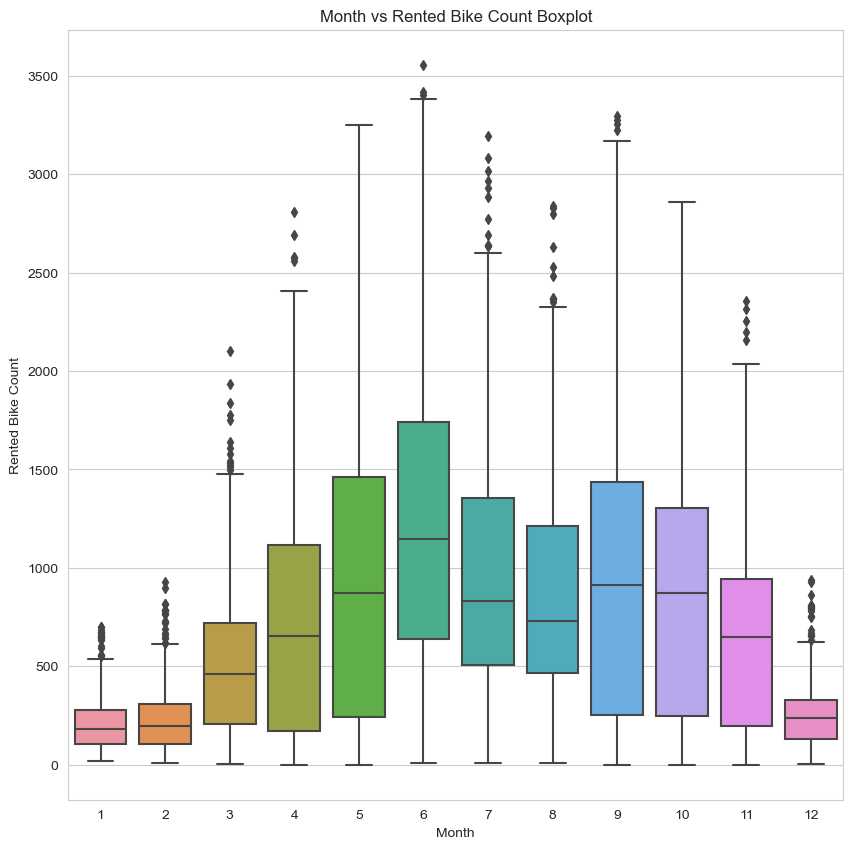

In [154]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Month", y="Rented Bike Count", data=df)
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.title("Month vs Rented Bike Count Boxplot") 
plt.show()

<br>It can be observed from the above boxplot that the number of rented bikes in Seoul drop considerably in the colder months of the year (Months 11 to 2) and are generally higher during the warmer months (Months 5 to 10).

This can supported by the fact that the summers in Seoul (in fact the whole of South Korea) are generally moderately hot with the highest temperatures reaching around 30°C. In contrast, the winters are extremely cold with the average temperature revolving around 0°C. 

The general population would prefer to ride the bikes in a more pleasant climate (i.e summer) than a more physically demanding climate (i.e winter).
<br>